In [1]:
import os
os.environ["SETTINGS_FILES"] = "../settings.toml;../.secrets.toml"  # settings files are not in current dir




from cognite.powerops.clients.powerops_client import PowerOpsClient,get_powerops_client
from cognite.client import CogniteClient

p: PowerOpsClient = get_powerops_client()
c: CogniteClient = p.cdf

print(c.config.project)


# TODO: find an event of type POWEROPS_SHOP_RUN, in the read dataset
EXAMPLES: dict[str, dict]= {
    "heco-dev": {
        "A": "POWEROPS_SHOP_RUN_47d45ac8-391a-4a60-8153-335784ffbc48",
        "B" :"POWEROPS_SHOP_RUN_71010201-3cd9-4df5-8193-aca3e5d323af", 
        "AHEAD_BID_MATRIX_CALCULATION":"POWEROPS_DAY_AHEAD_BID_MATRIX_CALCULATION_06877a8c-8acf-4adf-9618-00ec98de84bd"},
    
    "lyse-dev": {},
    "power-ops-staging": {},
    "heco-prod": {},
    "lyse-prod": {},
   }

SHOP_RUN_EVENT_EXT_A = EXAMPLES.get(c.config.project, {}).get("A", "")
SHOP_RUN_EVENT_EXT_B = EXAMPLES.get(c.config.project, {}).get("B", "")



heco-dev


/home/katrineholm/powerOps/power-ops-sdk/.venv/lib/python3.9/site-packages/pydantic/_internal/_fields.py:127: UserWarning: Field "model_template" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [2]:
# Todo: get example ids for staging/lyse dev/heco dev


from cognite.powerops.clients.shop.data_classes.shop_run import ShopRun


sample_run_a: ShopRun = p.shop.runs.retrieve(SHOP_RUN_EVENT_EXT_A)

sample_run_a.status

<Status.SUCCEEDED: 'SUCCEEDED'>

In [3]:
sample_run_a_result = sample_run_a.get_results()

sample_run_a_result

<ShopRunResult status=Status.SUCCEEDED>

## The Objective Function and Penalty Breakdown

In [3]:

# OBJECTIVE
objective = sample_run_results_a.objective_function
print(f"objective_function: {objective}")

# print(objective.data)
# print(objective.data_as_str())
# print(objective.watercourse)
# print(objective.penalty_breakdown)
print(objective.penalty_breakdown_as_str())


objective_function: <OBJECTIVE sequence_external_id=SHOP_Lågen_OBJECTIVE_9c4c66db-7176-461c-b47b-f6e6425f3a17>
Sum penalties: 556955328.5 |Major penalties: 0 |Minor penalties: 556955328.5
Breakdown of minor penalties
--------------------------
 - Objective
  * Average objective rsv tactical penalty: 556955328.5
 - Reservoir
  * Hinogla dam tactical penalty: 1231.7
  * Kaldfjorden tactical penalty up: 34.9
  * Kaldfjorden tactical penalty down: 2896.0
  * Kaldfjorden tactical penalty: 542985763.3



## Plotting time series of shop runs

['model.generator.HARP(2232)_G2.production', 'model.generator.HINO(390171)_G1.production', 'model.plant.HUND(2238).production', 'model.plant.NVIN(2225).production']


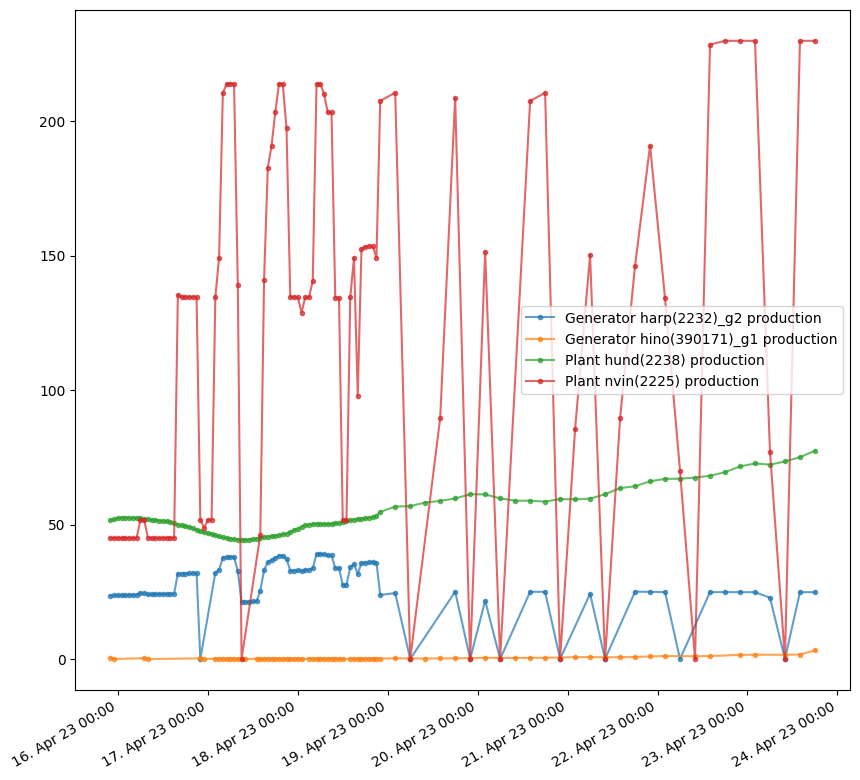

In [4]:

post_run_a = sample_run_results_a.post_run

found_keys = post_run_a.find_time_series(
    matches_object_types=["generator", "plant"],
    matches_object_names=["HARP(2232)_G2", "HINO(390171)_G1", "NVIN(2225)", "HUND(2238)"],
    matches_attribute_names=["production"],
)
print(found_keys)
post_run_a.plot(found_keys)

## Comparing Shop Run Results

In [5]:
sample_run_results_b = p.shop.runs.retrieve(SAMPLE_SHOP_RUN_EVENT_B).get_results()
post_run_b = sample_run_results_b.post_run

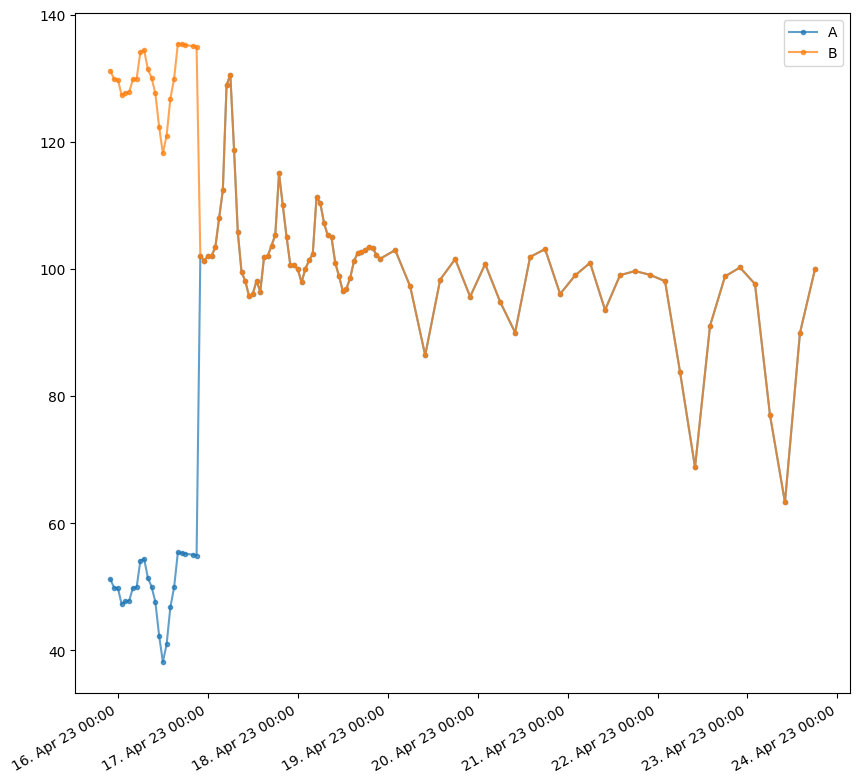

In [6]:
p.shop.results.compare.plot_time_series((post_run_a, post_run_b), "model.market.1.buy_price", ("A", "B"))

In [7]:
from IPython.display import Markdown

deep_diff_md = p.shop.results.compare.yaml_difference_md(post_run_a, post_run_b)


Markdown(deep_diff_md)

# Changes from Result A to Result B


## Items in Result B which are not in Result A:
#### Time series:  
Use `post_run.plot(key)` on Result B with one of the following keys 
 - `model.plant.HINO(390171).discharge`
 - `model.generator.HARP(2232)_G1.feeding_fee_objective`
 - `model.generator.HINO(390171)_G1.discharge`
 - `model.generator.ØVIN(2214)_G2.head_loss`
 - `model.plant.HINO(390171).gross_head`
 - `model.generator.NVIN(2225)_G4.discharge`
 - `model.generator.HUND(2238)_G1.solver_discharge`
 - `model.plant.NVIN(2225).production`
 - `model.reservoir.Hinogla-dam.head`
 - `model.generator.NVIN(2225)_G3.fcr_n_up_delivery_physical`
 - `model.plant.NVIN(2225).solver_production`
 - `model.plant.NVIN(2225).head_loss`
 - `model.reservoir.Bygdin.water_value_local_result`
 - `model.generator.HUND(2238)_G2.fcr_n_up_delivery_physical`
 - `model.generator.HARP(2232)_G2.fcr_n_down_delivery_physical`
 - `model.reservoir.Hinogla-dam.water_value_local_result`
 - `model.generator.ØVIN(2214)_G2.feeding_fee_objective`
 - `model.reservoir.Heimdalsvatn.energy_value_local_result`
 - `model.generator.HARP(2232)_G1.max_prod`
 - `model.reservoir.Vinstern.water_value_local_result`
 - `model.generator.HARP(2232)_G2.discharge`
 - `model.generator.NVIN(2225)_G3.production`
 - `model.generator.HUND(2238)_G2.fcr_n_down_delivery_physical`
 - `model.generator.NVIN(2225)_G3.solver_production`
 - `model.generator.HINO(390171)_G1.committed_out`
 - `model.reservoir.Vinstern.energy_value_local_result`
 - `model.plant.ØVIN(2214).solver_discharge`
 - `model.generator.NVIN(2225)_G4.head_loss`
 - `model.generator.ØVIN(2214)_G2.discharge_fee_objective`
 - `model.generator.NVIN(2225)_G5.fcr_n_up_delivery_physical`
 - `model.plant.HINO(390171).eff_head`
 - `model.generator.ØVIN(2214)_G2.committed_out`
 - `model.generator.NVIN(2225)_G5.discharge_fee_objective`
 - `model.generator.ØVIN(2214)_G2.production`
 - `model.generator.NVIN(2225)_G5.fcr_d_up_delivery_physical`
 - `model.generator.NVIN(2225)_G4.committed_out`
 - `model.plant.HINO(390171).production`
 - `model.plant.HINO(390171).prod_unbalance`
 - `model.generator.HINO(390171)_G1.max_prod`
 - `model.plant.HARP(2232).gross_head`
 - `model.reservoir.Bygdin.energy_value_local_result`
 - `model.generator.NVIN(2225)_G5.feeding_fee_objective`
 - `model.generator.ØVIN(2214)_G2.discharge`
 - `model.generator.HINO(390171)_G1.fcr_n_up_delivery_physical`
 - `model.generator.HINO(390171)_G1.eff_head`
 - `model.generator.HINO(390171)_G1.production`
 - `model.generator.HUND(2238)_G2.fcr_d_up_delivery_physical`
 - `model.generator.HUND(2238)_G2.solver_production`
 - `model.generator.HUND(2238)_G2.committed_out`
 - `model.generator.NVIN(2225)_G4.fcr_n_up_delivery_physical`
 - `model.generator.ØVIN(2214)_G2.market_income`
 - `model.generator.HUND(2238)_G2.feeding_fee_objective`
 - `model.generator.HINO(390171)_G1.solver_discharge`
 - `model.generator.ØVIN(2214)_G2.fcr_d_down_delivery_physical`
 - `model.generator.NVIN(2225)_G4.fcr_n_down_delivery_physical`
 - `model.generator.HARP(2232)_G2.committed_out`
 - `model.reservoir.Harpefossen-dam.storage`
 - `model.generator.HINO(390171)_G1.discharge_fee_objective`
 - `model.generator.NVIN(2225)_G4.fcr_d_up_delivery_physical`
 - `model.generator.NVIN(2225)_G3.fcr_n_down_delivery_physical`
 - `model.generator.HARP(2232)_G2.solver_discharge`
 - `model.generator.HARP(2232)_G1.solver_discharge`
 - `model.plant.ØVIN(2214).solver_production`
 - `model.generator.NVIN(2225)_G2.head_loss`
 - `model.generator.ØVIN(2214)_G2.fcr_n_up_delivery_physical`
 - `model.generator.NVIN(2225)_G5.market_income`
 - `model.generator.NVIN(2225)_G4.market_income`
 - `model.reservoir.Heimdalsvatn.water_value_local_result`
 - `model.generator.NVIN(2225)_G3.committed_out`
 - `model.generator.NVIN(2225)_G5.fcr_d_down_delivery_physical`
 - `model.generator.NVIN(2225)_G4.fcr_d_down_delivery_physical`
 - `model.generator.HARP(2232)_G1.production`
 - `model.plant.ØVIN(2214).head_loss`
 - `model.plant.ØVIN(2214).prod_unbalance`
 - `model.generator.HUND(2238)_G2.fcr_d_down_delivery_physical`
 - `model.reservoir.Olstappen.water_value_global_result`
 - `model.generator.ØVIN(2214)_G1.head_loss`
 - `model.generator.ØVIN(2214)_G2.solver_discharge`
 - `model.generator.HUND(2238)_G1.discharge`
 - `model.generator.HARP(2232)_G1.market_income`
 - `model.plant.HARP(2232).prod_unbalance`
 - `model.plant.NVIN(2225).solver_discharge`
 - `model.generator.NVIN(2225)_G3.fcr_d_up_delivery_physical`
 - `model.generator.HINO(390171)_G1.fcr_d_up_delivery_physical`
 - `model.generator.NVIN(2225)_G5.solver_production`
 - `model.reservoir.Hinogla-dam.tactical_penalty_down`
 - `model.generator.NVIN(2225)_G3.head_loss`
 - `model.generator.NVIN(2225)_G4.solver_discharge`
 - `model.plant.HINO(390171).solver_discharge`
 - `model.generator.NVIN(2225)_G3.discharge_fee_objective`
 - `model.generator.HINO(390171)_G1.market_income`
 - `model.generator.NVIN(2225)_G4.solver_production`
 - `model.generator.HUND(2238)_G2.min_prod`
 - `model.generator.HARP(2232)_G1.discharge_fee_objective`
 - `model.reservoir.Hinogla-dam.tactical_penalty_up`
 - `model.generator.NVIN(2225)_G4.production`
 - `model.generator.NVIN(2225)_G5.committed_out`
 - `model.generator.NVIN(2225)_G3.fcr_d_down_delivery_physical`
 - `model.reservoir.Hinogla-dam.tactical_penalty`
 - `model.reservoir.Heimdalsvatn.storage`
 - `model.plant.NVIN(2225).discharge`
 - `model.generator.NVIN(2225)_G3.market_income`
 - `model.generator.NVIN(2225)_G5.fcr_n_down_delivery_physical`
 - `model.generator.NVIN(2225)_G5.head_loss`
 - `model.generator.HUND(2238)_G2.max_prod`
 - `model.generator.HINO(390171)_G1.solver_production`
 - `model.generator.HARP(2232)_G2.fcr_d_up_delivery_physical`
 - `model.generator.HARP(2232)_G1.discharge`
 - `model.generator.HUND(2238)_G1.fcr_d_up_delivery_physical`
 - `model.generator.HARP(2232)_G2.fcr_d_down_delivery_physical`
 - `model.plant.ØVIN(2214).discharge`
 - `model.plant.NVIN(2225).prod_unbalance`
 - `model.gate.w_Heimdalsvatn_Kaldfjorden(2223).discharge`
 - `model.generator.HARP(2232)_G1.min_prod`
 - `model.generator.ØVIN(2214)_G2.fcr_n_down_delivery_physical`
 - `model.plant.ØVIN(2214).production`
 - `model.reservoir.Hinogla-dam.storage`
 - `model.generator.NVIN(2225)_G5.solver_discharge`
 - `model.generator.NVIN(2225)_G4.feeding_fee_objective`
 - `model.reservoir.Hinogla-dam.water_value_global_result`
 - `model.generator.HUND(2238)_G2.discharge`
 - `model.generator.NVIN(2225)_G4.discharge_fee_objective`
 - `model.reservoir.Hinogla-dam.energy_value_local_result`
 - `model.generator.HINO(390171)_G1.fcr_d_down_delivery_physical`
 - `model.generator.NVIN(2225)_G3.feeding_fee_objective`
 - `model.generator.HINO(390171)_G1.min_prod`
 - `model.generator.ØVIN(2214)_G2.fcr_d_up_delivery_physical`
 - `model.generator.HUND(2238)_G2.solver_discharge`
 - `model.generator.HARP(2232)_G2.fcr_n_up_delivery_physical`
 - `model.generator.NVIN(2225)_G3.solver_discharge`
 - `model.generator.NVIN(2225)_G3.discharge`
 - `model.generator.NVIN(2225)_G5.production`
 - `model.generator.HARP(2232)_G1.solver_production`
 - `model.generator.ØVIN(2214)_G2.solver_production`
 - `model.generator.NVIN(2225)_G1.head_loss`
 - `model.reservoir.Harpefossen-dam.head`
 - `model.generator.NVIN(2225)_G2.discharge`
 - `model.generator.HINO(390171)_G1.fcr_n_down_delivery_physical`
 - `model.plant.HINO(390171).solver_production`
 - `model.reservoir.Øyangen.water_value_global_result`
 - `model.generator.NVIN(2225)_G5.discharge`
 - `model.generator.NVIN(2225)_G2.solver_discharge`
 - `model.reservoir.Heimdalsvatn.head`


## Items in Result A which are not in Result B:
#### Value Items: 
 * `model.objective.scen_1.bypass_cost`
-19.087850871899
 * `model.generator.HARP(2232)_G2.startup_cost_total_objective`
-19.087850871899
 * `model.objective.average_objective.bypass_cost`
-19.087850871899
 * `model.generator.HARP(2232)_G2.startup_cost_mip_objective`
-19.087850871899

#### Time series:  
Use `post_run.plot(key)` on Result A with one of the following keys 
 - `model.plant.HINO(390171).discharge`
 - `model.reservoir.Olstappen.storage`
 - `model.generator.HINO(390171)_G1.discharge`
 - `model.reservoir.Olstappen.head`
 - `model.generator.HARP(2232)_G1.fcr_d_down_delivery_physical`
 - `model.generator.ØVIN(2214)_G2.head_loss`
 - `model.generator.NVIN(2225)_G4.discharge`
 - `model.generator.HUND(2238)_G1.solver_discharge`
 - `model.plant.NVIN(2225).production`
 - `model.generator.NVIN(2225)_G3.fcr_n_up_delivery_physical`
 - `model.generator.HARP(2232)_G2.max_prod`
 - `model.plant.NVIN(2225).solver_production`
 - `model.plant.NVIN(2225).head_loss`
 - `model.reservoir.Bygdin.water_value_local_result`
 - `model.generator.HARP(2232)_G2.min_prod`
 - `model.generator.HUND(2238)_G2.fcr_n_up_delivery_physical`
 - `model.generator.HARP(2232)_G2.fcr_n_down_delivery_physical`
 - `model.reservoir.Øyangen.energy_value_local_result`
 - `model.generator.ØVIN(2214)_G2.feeding_fee_objective`
 - `model.reservoir.Heimdalsvatn.energy_value_local_result`
 - `model.generator.HARP(2232)_G1.max_prod`
 - `model.gate.b_Hinogla-dam_Olstappen(390527).discharge`
 - `model.generator.HUND(2238)_G2.market_income`
 - `model.reservoir.Vinstern.water_value_local_result`
 - `model.generator.HARP(2232)_G2.discharge_fee_objective`
 - `model.generator.HUND(2238)_G2.production`
 - `model.generator.HARP(2232)_G2.discharge`
 - `model.generator.NVIN(2225)_G3.production`
 - `model.generator.HUND(2238)_G2.fcr_n_down_delivery_physical`
 - `model.generator.NVIN(2225)_G3.solver_production`
 - `model.generator.HINO(390171)_G1.committed_out`
 - `model.reservoir.Vinstern.energy_value_local_result`
 - `model.plant.ØVIN(2214).solver_discharge`
 - `model.generator.NVIN(2225)_G4.head_loss`
 - `model.generator.ØVIN(2214)_G2.discharge_fee_objective`
 - `model.generator.NVIN(2225)_G5.fcr_n_up_delivery_physical`
 - `model.generator.ØVIN(2214)_G2.committed_out`
 - `model.generator.NVIN(2225)_G5.discharge_fee_objective`
 - `model.generator.ØVIN(2214)_G2.production`
 - `model.generator.NVIN(2225)_G5.fcr_d_up_delivery_physical`
 - `model.generator.NVIN(2225)_G4.committed_out`
 - `model.plant.HINO(390171).production`
 - `model.generator.HARP(2232)_G2.production`
 - `model.plant.HINO(390171).prod_unbalance`
 - `model.generator.HARP(2232)_G2.solver_production`
 - `model.generator.HUND(2238)_G2.discharge_fee_objective`
 - `model.plant.HARP(2232).gross_head`
 - `model.reservoir.Bygdin.energy_value_local_result`
 - `model.plant.HUND(2238).prod_unbalance`
 - `model.generator.NVIN(2225)_G5.feeding_fee_objective`
 - `model.generator.ØVIN(2214)_G2.discharge`
 - `model.generator.HINO(390171)_G1.fcr_n_up_delivery_physical`
 - `model.generator.HINO(390171)_G1.production`
 - `model.generator.HUND(2238)_G2.fcr_d_up_delivery_physical`
 - `model.generator.HUND(2238)_G2.solver_production`
 - `model.generator.HUND(2238)_G2.committed_out`
 - `model.generator.NVIN(2225)_G4.fcr_n_up_delivery_physical`
 - `model.generator.ØVIN(2214)_G2.market_income`
 - `model.generator.HUND(2238)_G2.feeding_fee_objective`
 - `model.generator.HINO(390171)_G1.solver_discharge`
 - `model.generator.ØVIN(2214)_G2.fcr_d_down_delivery_physical`
 - `model.generator.NVIN(2225)_G4.fcr_n_down_delivery_physical`
 - `model.generator.HARP(2232)_G2.committed_out`
 - `model.reservoir.Harpefossen-dam.storage`
 - `model.generator.HINO(390171)_G1.discharge_fee_objective`
 - `model.reservoir.Øyangen.water_value_local_result`
 - `model.generator.NVIN(2225)_G4.fcr_d_up_delivery_physical`
 - `model.generator.HARP(2232)_G2.solver_discharge`
 - `model.generator.NVIN(2225)_G3.fcr_n_down_delivery_physical`
 - `model.plant.ØVIN(2214).solver_production`
 - `model.generator.HARP(2232)_G2.feeding_fee_objective`
 - `model.plant.NVIN(2225).gross_head`
 - `model.generator.HARP(2232)_G1.fcr_n_up_delivery_physical`
 - `model.generator.NVIN(2225)_G2.head_loss`
 - `model.generator.ØVIN(2214)_G2.fcr_n_up_delivery_physical`
 - `model.generator.NVIN(2225)_G5.market_income`
 - `model.generator.NVIN(2225)_G4.market_income`
 - `model.reservoir.Heimdalsvatn.water_value_local_result`
 - `model.generator.NVIN(2225)_G3.committed_out`
 - `model.generator.NVIN(2225)_G5.fcr_d_down_delivery_physical`
 - `model.generator.NVIN(2225)_G4.fcr_d_down_delivery_physical`
 - `model.plant.ØVIN(2214).head_loss`
 - `model.generator.HUND(2238)_G1.max_prod`
 - `model.plant.ØVIN(2214).prod_unbalance`
 - `model.generator.HUND(2238)_G2.fcr_d_down_delivery_physical`
 - `model.reservoir.Olstappen.water_value_global_result`
 - `model.generator.ØVIN(2214)_G1.head_loss`
 - `model.generator.ØVIN(2214)_G2.solver_discharge`
 - `model.generator.HUND(2238)_G1.discharge`
 - `model.plant.HARP(2232).prod_unbalance`
 - `model.plant.NVIN(2225).solver_discharge`
 - `model.generator.NVIN(2225)_G3.fcr_d_up_delivery_physical`
 - `model.generator.HINO(390171)_G1.fcr_d_up_delivery_physical`
 - `model.generator.NVIN(2225)_G5.solver_production`
 - `model.generator.NVIN(2225)_G3.head_loss`
 - `model.generator.NVIN(2225)_G4.solver_discharge`
 - `model.plant.HINO(390171).solver_discharge`
 - `model.generator.NVIN(2225)_G3.discharge_fee_objective`
 - `model.generator.HINO(390171)_G1.market_income`
 - `model.generator.NVIN(2225)_G4.solver_production`
 - `model.reservoir.Hinogla-dam.tactical_penalty_up`
 - `model.generator.NVIN(2225)_G4.production`
 - `model.generator.NVIN(2225)_G5.committed_out`
 - `model.generator.NVIN(2225)_G3.fcr_d_down_delivery_physical`
 - `model.reservoir.Hinogla-dam.tactical_penalty`
 - `model.reservoir.Heimdalsvatn.storage`
 - `model.plant.NVIN(2225).discharge`
 - `model.generator.NVIN(2225)_G3.market_income`
 - `model.generator.NVIN(2225)_G5.fcr_n_down_delivery_physical`
 - `model.generator.NVIN(2225)_G5.head_loss`
 - `model.generator.HINO(390171)_G1.solver_production`
 - `model.generator.HARP(2232)_G2.fcr_d_up_delivery_physical`
 - `model.generator.HARP(2232)_G1.fcr_n_down_delivery_physical`
 - `model.generator.HARP(2232)_G2.fcr_d_down_delivery_physical`
 - `model.plant.ØVIN(2214).discharge`
 - `model.plant.NVIN(2225).prod_unbalance`
 - `model.gate.w_Heimdalsvatn_Kaldfjorden(2223).discharge`
 - `model.generator.HARP(2232)_G1.min_prod`
 - `model.generator.HARP(2232)_G2.market_income`
 - `model.generator.ØVIN(2214)_G2.fcr_n_down_delivery_physical`
 - `model.plant.ØVIN(2214).production`
 - `model.generator.NVIN(2225)_G5.solver_discharge`
 - `model.generator.NVIN(2225)_G4.feeding_fee_objective`
 - `model.reservoir.Hinogla-dam.water_value_global_result`
 - `model.generator.HUND(2238)_G2.discharge`
 - `model.generator.NVIN(2225)_G4.discharge_fee_objective`
 - `model.generator.HINO(390171)_G1.fcr_d_down_delivery_physical`
 - `model.generator.NVIN(2225)_G3.feeding_fee_objective`
 - `model.generator.ØVIN(2214)_G2.fcr_d_up_delivery_physical`
 - `model.generator.HUND(2238)_G2.solver_discharge`
 - `model.generator.HARP(2232)_G2.fcr_n_up_delivery_physical`
 - `model.generator.NVIN(2225)_G3.solver_discharge`
 - `model.generator.NVIN(2225)_G3.discharge`
 - `model.generator.NVIN(2225)_G5.production`
 - `model.generator.ØVIN(2214)_G2.solver_production`
 - `model.generator.HUND(2238)_G1.min_prod`
 - `model.generator.HARP(2232)_G1.committed_out`
 - `model.generator.HARP(2232)_G1.fcr_d_up_delivery_physical`
 - `model.generator.NVIN(2225)_G1.head_loss`
 - `model.reservoir.Harpefossen-dam.head`
 - `model.generator.HINO(390171)_G1.fcr_n_down_delivery_physical`
 - `model.plant.HINO(390171).solver_production`
 - `model.reservoir.Øyangen.water_value_global_result`
 - `model.generator.NVIN(2225)_G5.discharge`
 - `model.reservoir.Heimdalsvatn.head`


## Items that are both in Result A (top) and Result B (bottom) but are different: 
#### Values: 
 - `model.objective.average_objective.grand_total`
    - -634227482.49118
    - -634630195.95107
 - `model.objective.average_objective.total`
    - -1191182810.9506
    - -1191585473.7225
 - `model.objective.average_objective.sum_penalties`
    - 556955328.45945
    - 556955277.77144
 - `model.objective.average_objective.minor_penalties`
    - 556955328.45945
    - 556955277.77144
 - `model.objective.average_objective.rsv_end_value`
    - -1186411604.7225
    - -1186423994.8096
 - `model.objective.average_objective.rsv_end_value_relative`
    - 1316915.0697458
    - 1304524.9825776
 - `model.objective.average_objective.vow_in_transit`
    - -170105.77820714
    - -170104.24242469
 - `model.objective.average_objective.market_sale_buy`
    - -4625606.15808
    - -5013138.4922347
 - `model.objective.average_objective.startup_costs`
    - 25011
    - 22297
 - `model.objective.average_objective.sum_feeding_fee`
    - -505.29187141397
    - -533.17820938235
 - `model.objective.average_objective.rsv_tactical_penalty`
    - 556955328.45944
    - 556955277.77144
 - `model.objective.scen_1.grand_total`
    - -634227482.49118
    - -634630195.95107
 - `model.objective.scen_1.total`
    - -1191182810.9506
    - -1191585473.7225
 - `model.objective.scen_1.sum_penalties`
    - 556955328.45945
    - 556955277.77144
 - `model.objective.scen_1.minor_penalties`
    - 556955328.45945
    - 556955277.77144
 - `model.objective.scen_1.rsv_end_value`
    - -1186411604.7225
    - -1186423994.8096
 - `model.objective.scen_1.rsv_end_value_relative`
    - 1316915.0697458
    - 1304524.9825776
 - `model.objective.scen_1.vow_in_transit`
    - -170105.77820714
    - -170104.24242469
 - `model.objective.scen_1.market_sale_buy`
    - -4625606.15808
    - -5013138.4922347
 - `model.objective.scen_1.startup_costs`
    - 25011
    - 22297
 - `model.objective.scen_1.sum_feeding_fee`
    - -505.29187141397
    - -533.17820938235
 - `model.objective.scen_1.rsv_tactical_penalty`
    - 556955328.45944
    - 556955277.77144

#### Time series:
Use `powerops.shop.results.compare.plot_time_series(('Result A', 'Result B'), key)`  on with one of the following keys 
 * `model.plant.HINO(390171).discharge`
 * `model.reservoir.Olstappen.storage`
 * `model.generator.HARP(2232)_G1.feeding_fee_objective`
 * `model.generator.HINO(390171)_G1.discharge`
 * `model.reservoir.Olstappen.head`
 * `model.plant.HARP(2232).eff_head`
 * `model.reservoir.Kaldfjorden.end_value`
 * `model.generator.HARP(2232)_G1.fcr_d_down_delivery_physical`
 * `model.generator.ØVIN(2214)_G2.max_prod`
 * `model.generator.ØVIN(2214)_G2.head_loss`
 * `model.reservoir.Hunderfossen-dam.energy_value_local_result`
 * `model.plant.HINO(390171).gross_head`
 * `model.generator.NVIN(2225)_G3.eff_head`
 * `model.generator.HUND(2238)_G1.feeding_fee_objective`
 * `model.generator.NVIN(2225)_G4.discharge`
 * `model.plant.ØVIN(2214).gross_head`
 * `model.reservoir.Øyangen.storage`
 * `model.plant.HUND(2238).head_loss`
 * `model.generator.NVIN(2225)_G1.min_prod`
 * `model.generator.HUND(2238)_G1.solver_discharge`
 * `model.plant.NVIN(2225).production`
 * `model.reservoir.Hinogla-dam.head`
 * `model.generator.NVIN(2225)_G2.max_prod`
 * `model.generator.HARP(2232)_G2.max_prod`
 * `model.plant.NVIN(2225).solver_production`
 * `model.plant.NVIN(2225).head_loss`
 * `model.reservoir.Hunderfossen-dam.water_value_global_result`
 * `model.reservoir.Hunderfossen-dam.water_value_local_result`
 * `model.reservoir.Bygdin.water_value_local_result`
 * `model.generator.HARP(2232)_G2.min_prod`
 * `model.generator.HARP(2232)_G2.fcr_n_down_delivery_physical`
 * `model.reservoir.Øyangen.energy_value_local_result`
 * `model.generator.NVIN(2225)_G2.feeding_fee_objective`
 * `model.reservoir.Hinogla-dam.water_value_local_result`
 * `model.generator.ØVIN(2214)_G2.feeding_fee_objective`
 * `model.reservoir.Øyangen.head`
 * `model.reservoir.Heimdalsvatn.energy_value_local_result`
 * `model.generator.HARP(2232)_G1.max_prod`
 * `model.generator.HUND(2238)_G2.market_income`
 * `model.generator.HARP(2232)_G1.eff_head`
 * `model.reservoir.Vinstern.water_value_local_result`
 * `model.generator.HARP(2232)_G2.discharge_fee_objective`
 * `model.reservoir.Harpefossen-dam.water_value_global_result`
 * `model.reservoir.Kaldfjorden.energy_value_local_result`
 * `model.generator.HUND(2238)_G2.production`
 * `model.generator.HARP(2232)_G2.discharge`
 * `model.generator.NVIN(2225)_G2.market_income`
 * `model.generator.NVIN(2225)_G3.production`
 * `model.generator.NVIN(2225)_G3.solver_production`
 * `model.generator.HINO(390171)_G1.committed_out`
 * `model.reservoir.Vinstern.energy_value_local_result`
 * `model.plant.ØVIN(2214).solver_discharge`
 * `model.generator.NVIN(2225)_G4.head_loss`
 * `model.generator.ØVIN(2214)_G2.discharge_fee_objective`
 * `model.generator.NVIN(2225)_G5.fcr_n_up_delivery_physical`
 * `model.plant.HINO(390171).eff_head`
 * `model.generator.NVIN(2225)_G5.eff_head`
 * `model.generator.NVIN(2225)_G5.discharge_fee_objective`
 * `model.generator.ØVIN(2214)_G2.production`
 * `model.generator.ØVIN(2214)_G2.committed_out`
 * `model.generator.NVIN(2225)_G5.fcr_d_up_delivery_physical`
 * `model.plant.HUND(2238).solver_discharge`
 * `model.plant.HINO(390171).production`
 * `model.generator.HARP(2232)_G2.production`
 * `model.plant.HINO(390171).prod_unbalance`
 * `model.generator.HARP(2232)_G2.solver_production`
 * `model.generator.HINO(390171)_G1.max_prod`
 * `model.generator.HUND(2238)_G2.discharge_fee_objective`
 * `model.generator.NVIN(2225)_G5.max_prod`
 * `model.plant.HARP(2232).gross_head`
 * `model.cut_group.1.end_value`
 * `model.reservoir.Kaldfjorden.storage`
 * `model.reservoir.Bygdin.energy_value_local_result`
 * `model.plant.HUND(2238).prod_unbalance`
 * `model.generator.NVIN(2225)_G5.feeding_fee_objective`
 * `model.generator.ØVIN(2214)_G2.discharge`
 * `model.plant.HUND(2238).solver_production`
 * `model.generator.HINO(390171)_G1.fcr_n_up_delivery_physical`
 * `model.generator.HINO(390171)_G1.eff_head`
 * `model.generator.HUND(2238)_G1.eff_head`
 * `model.generator.HUND(2238)_G1.discharge_fee_objective`
 * `model.generator.ØVIN(2214)_G1.min_prod`
 * `model.generator.HINO(390171)_G1.production`
 * `model.generator.HARP(2232)_G2.eff_head`
 * `model.generator.HUND(2238)_G2.solver_production`
 * `model.generator.NVIN(2225)_G4.fcr_n_up_delivery_physical`
 * `model.generator.ØVIN(2214)_G2.market_income`
 * `model.generator.HUND(2238)_G2.feeding_fee_objective`
 * `model.generator.HINO(390171)_G1.solver_discharge`
 * `model.generator.ØVIN(2214)_G2.fcr_d_down_delivery_physical`
 * `model.generator.HARP(2232)_G2.committed_out`
 * `model.generator.NVIN(2225)_G1.eff_head`
 * `model.reservoir.Harpefossen-dam.storage`
 * `model.generator.HINO(390171)_G1.discharge_fee_objective`
 * `model.generator.ØVIN(2214)_G1.max_prod`
 * `model.reservoir.Øyangen.water_value_local_result`
 * `model.generator.NVIN(2225)_G4.fcr_d_up_delivery_physical`
 * `model.generator.HARP(2232)_G2.solver_discharge`
 * `model.generator.HARP(2232)_G1.solver_discharge`
 * `model.plant.HUND(2238).production`
 * `model.reservoir.Kaldfjorden.change_in_end_value`
 * `model.plant.ØVIN(2214).solver_production`
 * `model.generator.HARP(2232)_G2.feeding_fee_objective`
 * `model.plant.NVIN(2225).gross_head`
 * `model.generator.HARP(2232)_G1.fcr_n_up_delivery_physical`
 * `model.generator.NVIN(2225)_G2.head_loss`
 * `model.plant.HUND(2238).discharge`
 * `model.generator.HUND(2238)_G1.market_income`
 * `model.generator.ØVIN(2214)_G2.fcr_n_up_delivery_physical`
 * `model.plant.HUND(2238).eff_head`
 * `model.generator.NVIN(2225)_G5.market_income`
 * `model.reservoir.Olstappen.water_value_local_result`
 * `model.generator.NVIN(2225)_G4.market_income`
 * `model.generator.HUND(2238)_G1.head_loss`
 * `model.reservoir.Heimdalsvatn.water_value_local_result`
 * `model.plant.HARP(2232).solver_discharge`
 * `model.generator.NVIN(2225)_G5.fcr_d_down_delivery_physical`
 * `model.generator.ØVIN(2214)_G2.min_prod`
 * `model.generator.HARP(2232)_G1.production`
 * `model.plant.ØVIN(2214).head_loss`
 * `model.generator.NVIN(2225)_G4.eff_head`
 * `model.reservoir.Kaldfjorden.water_value_local_result`
 * `model.reservoir.Kaldfjorden.tactical_penalty_up`
 * `model.generator.HUND(2238)_G1.max_prod`
 * `model.plant.ØVIN(2214).prod_unbalance`
 * `model.reservoir.Kaldfjorden.tactical_penalty_down`
 * `model.generator.NVIN(2225)_G2.production`
 * `model.generator.NVIN(2225)_G2.min_prod`
 * `model.reservoir.Kaldfjorden.tactical_penalty`
 * `model.reservoir.Olstappen.water_value_global_result`
 * `model.generator.ØVIN(2214)_G1.head_loss`
 * `model.generator.NVIN(2225)_G2.eff_head`
 * `model.generator.HUND(2238)_G1.production`
 * `model.generator.HUND(2238)_G1.discharge`
 * `model.generator.HARP(2232)_G1.market_income`
 * `model.generator.HUND(2238)_G2.head_loss`
 * `model.generator.ØVIN(2214)_G2.solver_discharge`
 * `model.market.1.sale`
 * `model.market.1.sale_price`
 * `model.plant.HARP(2232).prod_unbalance`
 * `model.generator.NVIN(2225)_G3.fcr_d_up_delivery_physical`
 * `model.plant.NVIN(2225).solver_discharge`
 * `model.generator.NVIN(2225)_G5.min_prod`
 * `model.plant.HARP(2232).head_loss`
 * `model.generator.HINO(390171)_G1.fcr_d_up_delivery_physical`
 * `model.generator.NVIN(2225)_G5.solver_production`
 * `model.generator.ØVIN(2214)_G2.eff_head`
 * `model.reservoir.Hinogla-dam.tactical_penalty_down`
 * `model.reservoir.Harpefossen-dam.energy_value_local_result`
 * `model.generator.NVIN(2225)_G3.head_loss`
 * `model.generator.NVIN(2225)_G4.solver_discharge`
 * `model.plant.HINO(390171).solver_discharge`
 * `model.generator.NVIN(2225)_G3.discharge_fee_objective`
 * `model.generator.HINO(390171)_G1.market_income`
 * `model.generator.NVIN(2225)_G1.max_prod`
 * `model.generator.HUND(2238)_G2.min_prod`
 * `model.generator.NVIN(2225)_G4.solver_production`
 * `model.generator.HARP(2232)_G1.discharge_fee_objective`
 * `model.reservoir.Hinogla-dam.tactical_penalty_up`
 * `model.generator.NVIN(2225)_G4.production`
 * `model.generator.NVIN(2225)_G5.committed_out`
 * `model.generator.NVIN(2225)_G3.max_prod`
 * `model.reservoir.Hinogla-dam.tactical_penalty`
 * `model.plant.ØVIN(2214).eff_head`
 * `model.reservoir.Heimdalsvatn.storage`
 * `model.plant.NVIN(2225).discharge`
 * `model.generator.NVIN(2225)_G3.market_income`
 * `model.generator.NVIN(2225)_G5.fcr_n_down_delivery_physical`
 * `model.generator.NVIN(2225)_G5.head_loss`
 * `model.generator.HUND(2238)_G2.max_prod`
 * `model.generator.HINO(390171)_G1.solver_production`
 * `model.generator.HARP(2232)_G2.fcr_d_up_delivery_physical`
 * `model.generator.NVIN(2225)_G3.min_prod`
 * `model.generator.HARP(2232)_G1.discharge`
 * `model.reservoir.Olstappen.energy_value_local_result`
 * `model.plant.HARP(2232).discharge`
 * `model.generator.HUND(2238)_G1.fcr_d_up_delivery_physical`
 * `model.generator.ØVIN(2214)_G1.eff_head`
 * `model.plant.NVIN(2225).eff_head`
 * `model.generator.HARP(2232)_G1.fcr_n_down_delivery_physical`
 * `model.generator.HUND(2238)_G1.solver_production`
 * `model.generator.HARP(2232)_G2.fcr_d_down_delivery_physical`
 * `model.generator.NVIN(2225)_G4.min_prod`
 * `model.plant.ØVIN(2214).discharge`
 * `model.gate.w_Kaldfjorden_Øyangen(2218).discharge`
 * `model.plant.NVIN(2225).prod_unbalance`
 * `model.gate.w_Heimdalsvatn_Kaldfjorden(2223).discharge`
 * `model.reservoir.Kaldfjorden.head`
 * `model.generator.HARP(2232)_G1.min_prod`
 * `model.plant.HARP(2232).solver_production`
 * `model.generator.HARP(2232)_G2.market_income`
 * `model.reservoir.Harpefossen-dam.water_value_local_result`
 * `model.generator.ØVIN(2214)_G2.fcr_n_down_delivery_physical`
 * `model.generator.HARP(2232)_G2.head_loss`
 * `model.plant.ØVIN(2214).production`
 * `model.reservoir.Hinogla-dam.storage`
 * `model.generator.NVIN(2225)_G5.solver_discharge`
 * `model.generator.NVIN(2225)_G4.feeding_fee_objective`
 * `model.reservoir.Hinogla-dam.water_value_global_result`
 * `model.generator.HUND(2238)_G2.discharge`
 * `model.generator.NVIN(2225)_G4.discharge_fee_objective`
 * `model.reservoir.Hinogla-dam.energy_value_local_result`
 * `model.generator.HINO(390171)_G1.fcr_d_down_delivery_physical`
 * `model.generator.NVIN(2225)_G3.feeding_fee_objective`
 * `model.generator.HINO(390171)_G1.min_prod`
 * `model.generator.ØVIN(2214)_G2.fcr_d_up_delivery_physical`
 * `model.generator.HUND(2238)_G2.solver_discharge`
 * `model.generator.HARP(2232)_G2.fcr_n_up_delivery_physical`
 * `model.generator.NVIN(2225)_G3.solver_discharge`
 * `model.generator.NVIN(2225)_G4.max_prod`
 * `model.generator.NVIN(2225)_G3.discharge`
 * `model.generator.NVIN(2225)_G5.production`
 * `model.generator.HARP(2232)_G1.solver_production`
 * `model.generator.HUND(2238)_G1.min_prod`
 * `model.generator.ØVIN(2214)_G2.solver_production`
 * `model.generator.HARP(2232)_G1.committed_out`
 * `model.generator.HARP(2232)_G1.fcr_d_up_delivery_physical`
 * `model.generator.NVIN(2225)_G1.head_loss`
 * `model.reservoir.Harpefossen-dam.head`
 * `model.generator.HUND(2238)_G2.eff_head`
 * `model.plant.HARP(2232).production`
 * `model.generator.HINO(390171)_G1.fcr_n_down_delivery_physical`
 * `model.plant.HINO(390171).solver_production`
 * `model.reservoir.Øyangen.water_value_global_result`
 * `model.market.1.buy_price`
 * `model.generator.HARP(2232)_G1.head_loss`
 * `model.generator.NVIN(2225)_G5.discharge`
 * `model.generator.NVIN(2225)_G2.solver_production`
 * `model.reservoir.Heimdalsvatn.head`

